<a href="https://colab.research.google.com/github/iscel15/Ciencia-de-datos/blob/main/Time_Series_problem_using_a_Recurrenet_Neural_Network_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving a Time Series problem using a Recurrenet Neural Network model

We are going to fix sequences from a noisy sin function into our RNN model, and from that, were going to recover the actual sin function. First 1500 steps for training, and other 500 for prediction and testing. 

For this, we can stablish four main steps: 

**1. Prepare general dataset**

**2. Prepare dataset for training**

**3. Create and train model**

**4. Plot results**



## Import neccesary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

*np.random.seed()* is for making sure  any random value generated is **reproducible**

In [ ]:
np.random.seed(0)

## Preparing our data

**1. General dataset**
**2. Prepare dataset for training**
**3. Create and train model**
**4. Plot results**


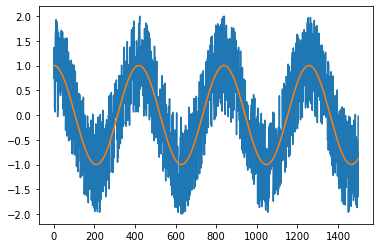

In [ ]:
t = np.arange(0,1500)
x = np.cos(0.015*t) + np.random.uniform(low=-1, high=1, size=(1500,))
plt.plot(x)

x_actual = np.cos(0.015*t)
plt.plot(x_actual)

## **Import**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## **Normalize**

In [ ]:
normalizer = MinMaxScaler(feature_range=(0,1))
x = (np.reshape(x, (-1,1)))
x = normalizer.fit_transform(x)
print(x)

[[0.68804927]
 [0.71503837]
 [0.84247459]
 ...
 [0.09794421]
 [0.08655682]
 [0.49409089]]


## **Create Datast**

In [ ]:
train = x[0:1000]
test = x[1000:]
print(train.shape)

(1000, 1)


In [ ]:
def createDataset(data,step):
  X, Y = [], []
  for i in range(len(data)-step):
    X.append(data[i:i+step])
    Y.append(data[i+step])
  return np.array(X), np.array(Y)

step = 10
trainX,trainY = createDataset(train,step)
testX,testY = createDataset(test,step)
print(trainX[0])

[[0.68804927]
 [0.71503837]
 [0.84247459]
 [0.80117092]
 [0.53504159]
 [0.57840017]
 [0.5345146 ]
 [0.51611838]
 [0.88738153]
 [0.9244793 ]]


In [ ]:
print(trainY[0])

[0.70598137]


In [ ]:
print(trainX.shape)

(990, 10, 1)


## **Training our Network**

**Sequential class**: Linear stack of functional layers, constitute our network model.
**Layers **: Dense and SimpleRNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

Historically, the **tanh** function became preferred over the sigmoid function as it gave better performance for multi-layer neural networks. But it did not solve the vanishing gradient problem that sigmoids suffered, which was tackled more effectively with the introduction of ReLU activations.

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=1, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [ ]:
history = model.fit(trainX,trainY,epochs=200, batch_size=16, verbose=2)

Epoch 1/200
62/62 - 2s - loss: 0.0697 - 2s/epoch - 25ms/step
Epoch 2/200
62/62 - 0s - loss: 0.0462 - 404ms/epoch - 7ms/step
Epoch 3/200
62/62 - 0s - loss: 0.0391 - 390ms/epoch - 6ms/step
Epoch 4/200
62/62 - 0s - loss: 0.0310 - 419ms/epoch - 7ms/step
Epoch 5/200
62/62 - 0s - loss: 0.0276 - 401ms/epoch - 6ms/step
Epoch 6/200
62/62 - 0s - loss: 0.0264 - 468ms/epoch - 8ms/step
Epoch 7/200
62/62 - 0s - loss: 0.0257 - 428ms/epoch - 7ms/step
Epoch 8/200
62/62 - 0s - loss: 0.0251 - 331ms/epoch - 5ms/step
Epoch 9/200
62/62 - 0s - loss: 0.0249 - 292ms/epoch - 5ms/step
Epoch 10/200
62/62 - 0s - loss: 0.0246 - 280ms/epoch - 5ms/step
Epoch 11/200
62/62 - 0s - loss: 0.0244 - 250ms/epoch - 4ms/step
Epoch 12/200
62/62 - 0s - loss: 0.0240 - 224ms/epoch - 4ms/step
Epoch 13/200
62/62 - 0s - loss: 0.0238 - 256ms/epoch - 4ms/step
Epoch 14/200
62/62 - 0s - loss: 0.0238 - 233ms/epoch - 4ms/step
Epoch 15/200
62/62 - 0s - loss: 0.0238 - 275ms/epoch - 4ms/step
Epoch 16/200
62/62 - 0s - loss: 0.0236 - 264ms/epoc

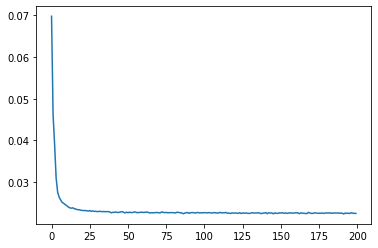

In [ ]:
loss = history.history['loss']
plt.plot(loss)

In [ ]:
trainPredict = model.predict(trainX)
testPredict = normalizer.inverse_transform(model.predict(testX))
predicted = np.concatenate((trainPredict,testPredict))
x = normalizer.inverse_transform(x)

16/16 [==============================] - 0s 3ms/step


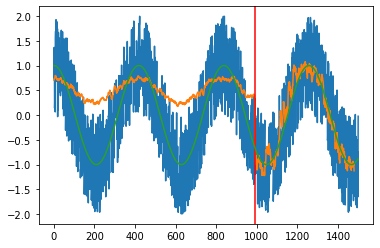

In [ ]:
plt.plot(x)
plt.plot(predicted)
plt.axvline(len(trainX), c="r")
plt.plot(np.cos(0.015*t))